In [12]:
%reload_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import numpy as np

## TrialEEG
La classe base per contenere le informazioni di un trial. 
Può essere creata fornendo tre input: 
- eeg_signals   : matrice (num_channels x num_timepoints) che contiene i segnali
- label         : label per il trial, può essere un intero o una stringa
- timepoints    : vettore con i tempi (in secondi)

Il numero di timepoints deve coincidere con la seconda dimensione della matrice dei segnali

In [13]:
from datasets import TrialEEG

eeg_signals = np.zeros((25, 500))
timepoints = np.linspace(0,5,500)
label = 0

trial = TrialEEG(eeg_signals, label, timepoints)

Facendo il print di un trial si ottengono le informazioni su di esso

In [3]:
print(trial)

Numero canali = 25, numero timepoints = 500
Istante iniziale = 0.0, tempo finale = 5.0


## DatasetEEG
I dataset sono classi di tipo DatasetEEG, che fungono da contenitori per i vari trial.
E' possibile creare un nuovo dataset passando al costruttore una lista di trial. Durante la creazione è possibile fornire informazioni addizionali che verranno memorizzate nel dataset. Il print del dataset mostra le sue caratteristiche.

In [14]:
from datasets import DatasetEEG

trial_1 = TrialEEG(eeg_signals=np.zeros((25, 500)), label=0, timepoints=np.linspace(0,5,500))
trial_2 = TrialEEG(eeg_signals=np.zeros((25, 750)), label=1, timepoints=np.linspace(0,7.5,750))
trial_3 = TrialEEG(eeg_signals=np.zeros((25, 1000)), label=2, timepoints=np.linspace(0,10,1000))
info = {'sampling_frequency': 250, 'subject': 0, 'session': 'A'}

dataset = DatasetEEG([trial_1, trial_2, trial_3], info=info)

print(dataset)

num_trials               :  3
num_channels             :  25
num_timepoints           :  Trials of different length
labels_type              :  int
sampling_frequency       :  250
subject                  :  0
session                  :  A



I dataset possono essere salvati usando la funzione "save". Allo stesso modo possono essere caricati da file usando la funzione "load". Quest'ultima è una funzione statica, quindi viene chiamata facendo riferimento alla classe DatasetEEG stessa e non a un'istanza della classe.

In [15]:
dataset = DatasetEEG.load('DatasetBCI/Dataset_01_Training.dataset')

print(dataset)

num_trials               :  288
num_channels             :  22
num_timepoints           :  Trials of different length
labels_type              :  int
subject                  :  1
fs                       :  250



E' possibile accedere ai trial nel dataset attraverso il parametro "trials". 
I singoli trials possono anche essere visualizzati con la funzione "plot()", il cui argomento "split_channels" specifica se i canali devono essere sovrapposti o separati.

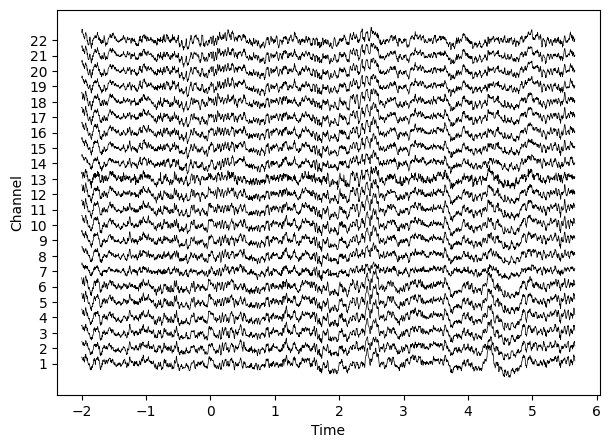

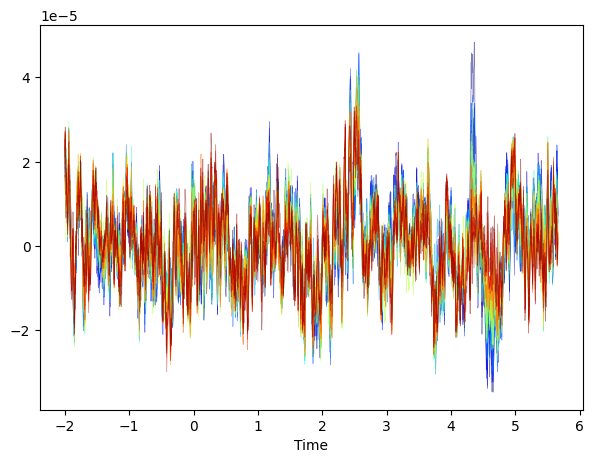

In [16]:
trial = dataset.trials[5]

plt.figure(figsize=(7,5))
trial.plot(split_channels=True)

plt.figure(figsize=(7,5))
trial.plot(split_channels=False)

plt.show()

Come è evidente dall'ultima immagine, i dati non sono normalizzati.
E' possibile normalizzare l'intero dataset usando le funzioni contenute in "dataset_filters", scegliendo tra normalizzazioni per trial, lungo tutti i trial o usando un particolare intervallo temporale come baseline. Le funzioni agiscono modificando in-place il dataset e non restituiscono nulla.

In questo caso normalizziamo lungo trial e tempi contemporaneamente (notare il cambio dell'asse verticale nella figura).

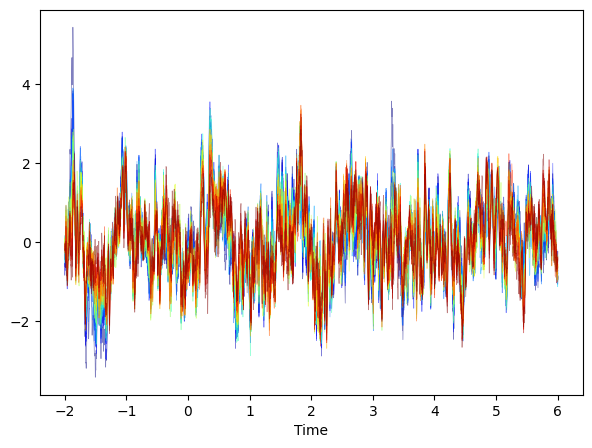

In [10]:
from dataset_filters import normalize_signals

normalize_signals(dataset, across_trials=True)

plt.figure(figsize=(7,5))
trial.plot(split_channels=False)

plt.show()

Altri filtri contenuti in "dataset_filters" permettono di spezzare i trial presenti in più sotto-trial con una finestra mobile o di croppare i segnali in modo che tutti i trial abbiano la stessa lunghezza temporale. Ciò è essenziale per poter lavorare con modelli di reti neurali.

Gli argomenti della funzione "crop_signals" sono "t_min" e "t_max", per specificare gli istanti (in secondi) che delimitano la finestra per il crop. Anche in questo caso il dataset è modificato in-place. (notare come tutti i trial hanno la stessa lunghezza temporale nel print)

In [16]:
from dataset_filters import crop_signals

crop_signals(dataset, t_min=0.5, t_max=2.5)
print(dataset)

num_trials               :  288
num_channels             :  22
num_timepoints           :  500
labels_type              :  int
subject                  :  1
fs                       :  250



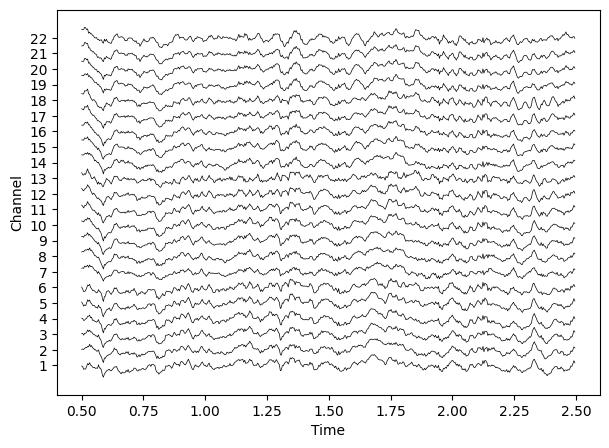

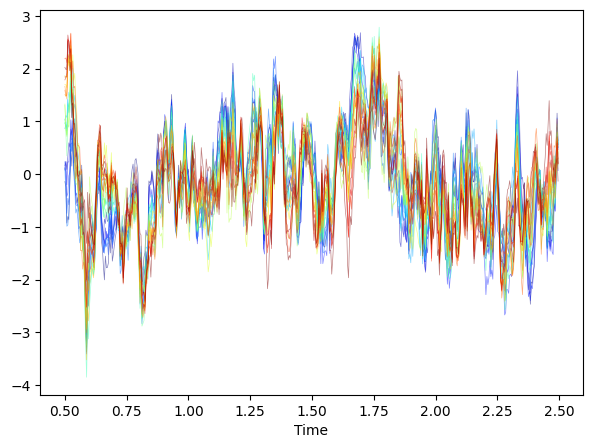

In [18]:
trial = dataset.trials[1]

plt.figure(figsize=(7,5))
trial.plot(split_channels=True)

plt.figure(figsize=(7,5))
trial.plot(split_channels=False)

plt.show()